# ***Hierachical Clustering Model***

In [3]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [7]:
# Step 2: load the dataset
# Replace 'data.csv' with the path to your dataset
data = pd.read_csv('Wholesale customers data.csv')

In [9]:
# Step 3: Inspect the data

data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [11]:
# Standardize the data to have zero mean and unit variance (import for clustering)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [13]:
# Step 4: Generate the dendrogram to visualize the clustering process
# Using the 'ward' linkage criterian for hierarchical clustering
linked = linkage(data_scaled, method='ward')

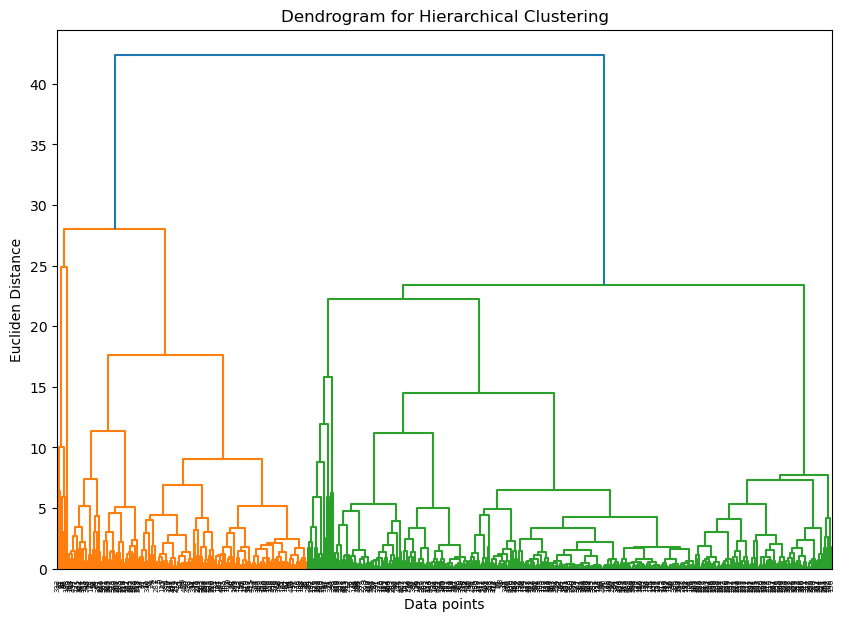

In [15]:
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data points")
plt.ylabel("Eucliden Distance")
plt.show()

In [21]:
# Step 5: Fit the Agglomerative Clustering model
# Decide on the number of clusters by observing the dendrogram or specifying directly
n_clusters = 3   # Adjust this based on dendrogram interpretation

In [23]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
labels = model.fit_predict(data_scaled)

In [25]:
# Step 6: Add the labels to the original dataset
data['Cluster'] = labels

In [27]:
# Step 7: Analyze the clusters (optional)
data.groupby('Cluster').mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,,,,
0,1.833333,2.833333,27477.000000,43542.166667,54588.500000,8285.666667,25018.333333,10247.833333
1,1.003356,2.510067,13440.412752,3426.466443,3968.342282,3642.949664,804.312081,1310.520134
2,2.000000,2.602941,8161.955882,9323.654412,14621.066176,1590.713235,6456.338235,1609.713235


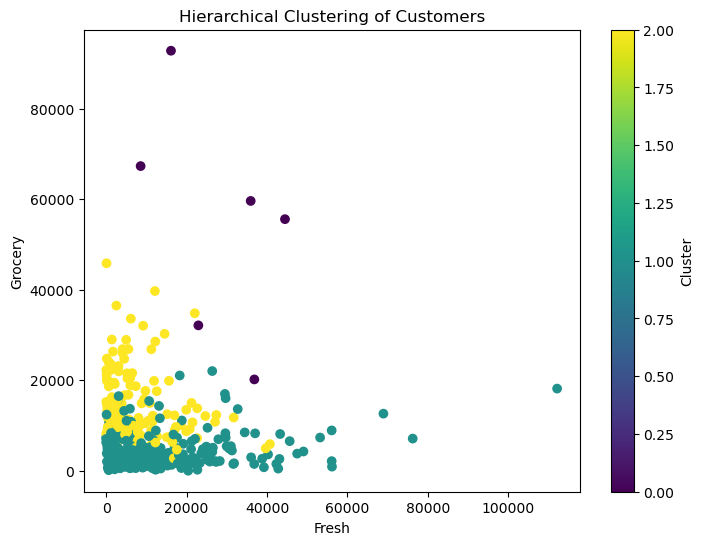

In [35]:
# Step 8: Visualize the clusters (for 2D visualization using Fresh and Milk as example)
plt.figure(figsize=(8, 6))
plt.scatter(data['Fresh'], data['Grocery'], c=labels, cmap='viridis', marker='o')
plt.title("Hierarchical Clustering of Customers")
plt.xlabel("Fresh")
plt.ylabel("Grocery")
plt.colorbar(label='Cluster')
plt.show()

## ***Cluster Characteristics:***

In [37]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,2
1,2,3,7057,9810,9568,1762,3293,1776,2
2,2,3,6353,8808,7684,2405,3516,7844,2
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,2


## ***Action***